# Exercise 1

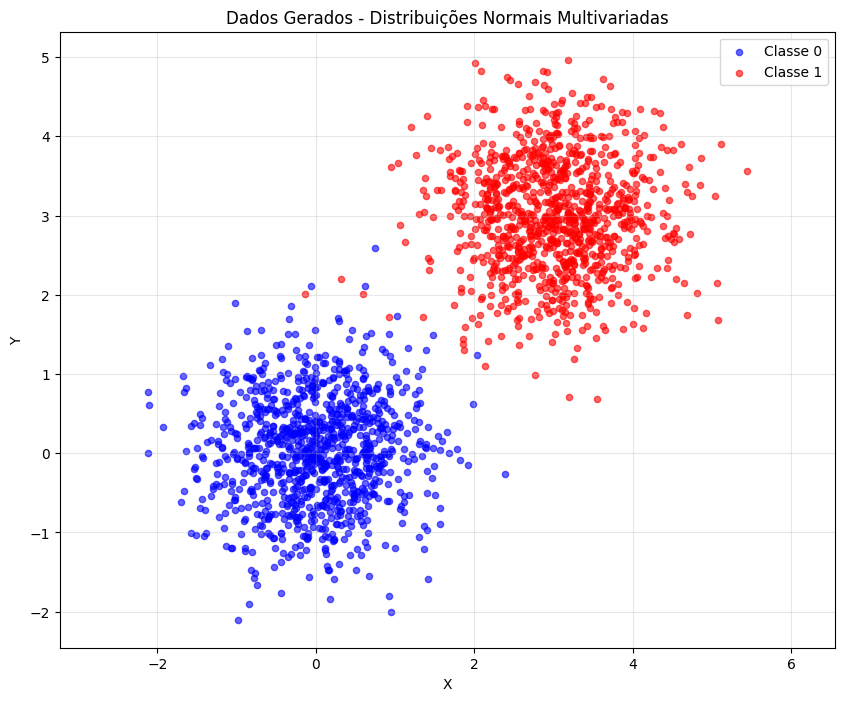

Estatísticas da Classe 0:
Média: [-0.00518042  0.0281636 ]
Matriz de Covariância:
[[0.4938596  0.02465815]
 [0.02465815 0.4724993 ]]

Estatísticas da Classe 1:
Média: [3.00209722 3.0015421 ]
Matriz de Covariância:
[[0.52323099 0.00376084]
 [0.00376084 0.51410261]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

mean_0 = [0, 0]
cov_0 = [[0.5, 0], [0, 0.5]]

mean_1 = [3, 3]
cov_1 = [[0.5, 0], [0, 0.5]]

class_0 = np.random.multivariate_normal(mean_0, cov_0, 1000)
class_1 = np.random.multivariate_normal(mean_1, cov_1, 1000)

plt.figure(figsize=(10, 8))
plt.scatter(class_0[:, 0], class_0[:, 1], c='blue', alpha=0.6, label='Classe 0', s=20)
plt.scatter(class_1[:, 0], class_1[:, 1], c='red', alpha=0.6, label='Classe 1', s=20)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dados Gerados - Distribuições Normais Multivariadas')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

print("Estatísticas da Classe 0:")
print(f"Média: {np.mean(class_0, axis=0)}")
print(f"Matriz de Covariância:\n{np.cov(class_0.T)}")

print("\nEstatísticas da Classe 1:")
print(f"Média: {np.mean(class_1, axis=0)}")
print(f"Matriz de Covariância:\n{np.cov(class_1.T)}")

Pesos iniciais: [-0.0073947   0.02026473]
Bias inicial: 0.0
Época 1: Acurácia = 0.9890
Época 2: Acurácia = 0.9920
Época 3: Acurácia = 0.9945
Época 4: Acurácia = 0.9950
Época 5: Acurácia = 0.9950
Época 6: Acurácia = 0.9950
Época 7: Acurácia = 0.9950
Época 8: Acurácia = 0.9950
Época 9: Acurácia = 0.9960
Época 10: Acurácia = 0.9940
Época 11: Acurácia = 0.9940
Época 12: Acurácia = 0.9945
Época 13: Acurácia = 0.9970
Época 14: Acurácia = 0.9950
Época 15: Acurácia = 0.9945
Época 16: Acurácia = 0.9945
Época 17: Acurácia = 0.9945
Época 18: Acurácia = 0.9945
Época 19: Acurácia = 0.9945
Época 20: Acurácia = 0.9945
Época 21: Acurácia = 0.9935
Época 22: Acurácia = 0.9935
Época 23: Acurácia = 0.9965
Época 24: Acurácia = 0.9965
Época 25: Acurácia = 0.9970
Época 26: Acurácia = 0.9965
Época 27: Acurácia = 0.9950
Época 28: Acurácia = 0.9950
Época 29: Acurácia = 0.9965
Época 30: Acurácia = 0.9955
Época 31: Acurácia = 0.9960
Época 32: Acurácia = 0.9960
Época 33: Acurácia = 0.9950
Época 34: Acurácia = 0.99

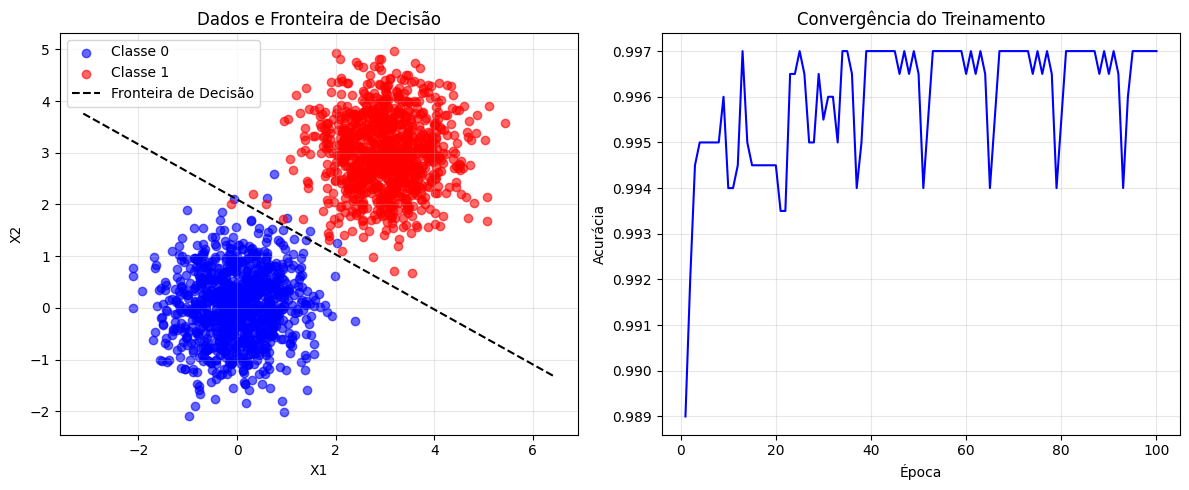

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.vstack([class_0, class_1])
y = np.hstack([np.zeros(1000), np.ones(1000)])

indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

w = np.random.normal(0, 0.01, 2)  
b = 0.0  
learning_rate = 0.1
accuracy_history = []

print(f"Pesos iniciais: {w}")
print(f"Bias inicial: {b}")

for epoch in range(100):
    updates = 0
    
    for i in range(len(X)):
    
        prediction = 1 if (np.dot(w, X[i]) + b) >= 0 else 0
        
        if prediction != y[i]:
            error = y[i] - prediction
            w += learning_rate * error * X[i]
            b += learning_rate * error
            updates += 1
    
    predictions = []
    for i in range(len(X)):
        pred = 1 if (np.dot(w, X[i]) + b) >= 0 else 0
        predictions.append(pred)
    accuracy = np.mean(np.array(predictions) == y)
    accuracy_history.append(accuracy)
    
    print(f"Época {epoch+1}: Acurácia = {accuracy:.4f}")
    
    if updates == 0:
        print(f"Convergência na época {epoch+1}")
        break

print(f"\nPesos finais: {w}")
print(f"Bias final: {b}")
print(f"Acurácia final: {accuracy:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)

class_0_idx = y == 0
class_1_idx = y == 1
plt.scatter(X[class_0_idx, 0], X[class_0_idx, 1], c='blue', alpha=0.6, label='Classe 0')
plt.scatter(X[class_1_idx, 0], X[class_1_idx, 1], c='red', alpha=0.6, label='Classe 1')


x1_range = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100)
x2_boundary = -(w[0] * x1_range + b) / w[1]
plt.plot(x1_range, x2_boundary, 'k--', label='Fronteira de Decisão')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Dados e Fronteira de Decisão')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(accuracy_history)+1), accuracy_history, 'b-')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.title('Convergência do Treinamento')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Exercise 2

EXERCÍCIO 2 - Dados com Sobreposição
Classe 0 - Média: [1, 1], Covariância diagonal: 1.5
Classe 1 - Média: [2, 2], Covariância diagonal: 1.5
Distância entre médias: 1.41

TREINAMENTO ÚNICO:
Pesos iniciais: [ 0.00645038 -0.00012413]
Bias inicial: 0.0
------------------------------
Época 10: Acurácia = 0.6960, Updates = 774
Época 20: Acurácia = 0.7035, Updates = 795
Época 30: Acurácia = 0.6315, Updates = 767
Época 40: Acurácia = 0.6565, Updates = 764
Época 50: Acurácia = 0.7025, Updates = 775
Época 60: Acurácia = 0.6615, Updates = 787
Época 70: Acurácia = 0.6145, Updates = 791
Época 80: Acurácia = 0.6965, Updates = 794
Época 90: Acurácia = 0.6830, Updates = 796
Época 100: Acurácia = 0.6695, Updates = 784

Pesos finais: [0.24102045 0.20085217]
Bias final: -0.4
Acurácia final: 0.6695

MÚLTIPLAS EXECUÇÕES (5 runs):
Run 1: Acurácia = 0.6880
Run 2: Acurácia = 0.6675
Run 3: Acurácia = 0.6335
Run 4: Acurácia = 0.7040
Run 5: Acurácia = 0.6855

Acurácia média: 0.6757 ± 0.0241
Melhor acurácia: 0.7

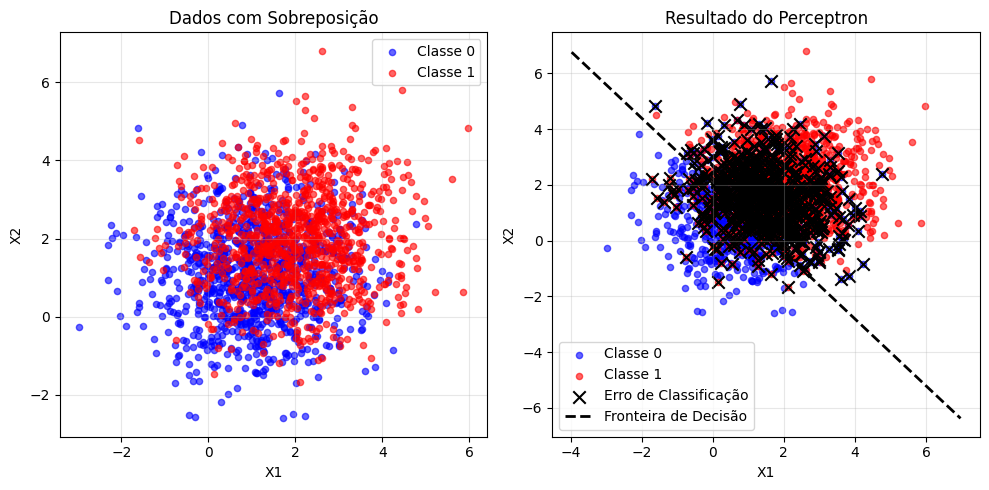

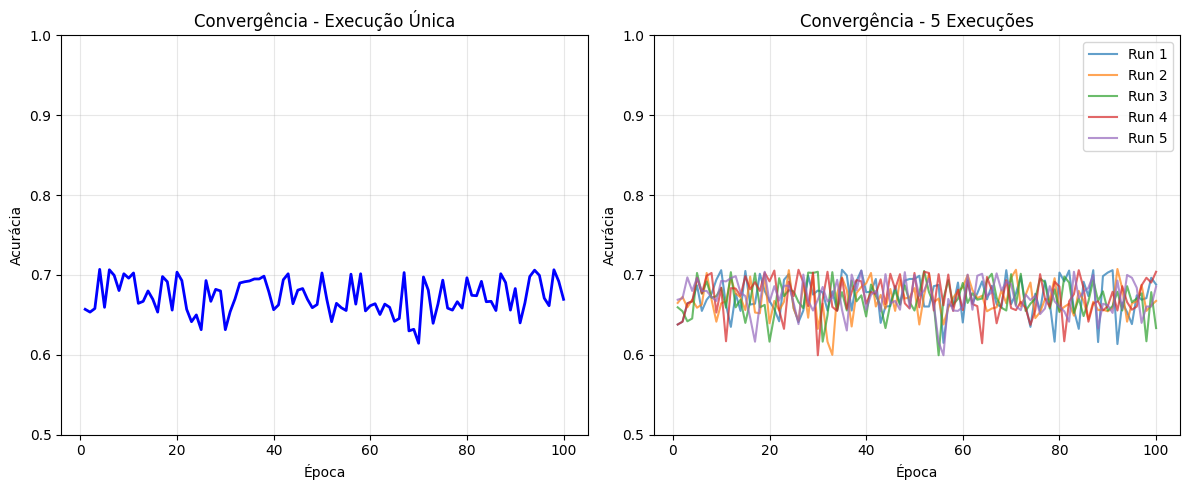


ANÁLISE COMPARATIVA COM EXERCÍCIO 1:
Exercício 1 (dados separáveis):
- Distância entre médias: 4.24
- Variância: 0.5
- Esperado: Convergência rápida, acurácia ~100%

Exercício 2 (dados com sobreposição):
- Distância entre médias: 1.41
- Variância: 1.5
- Resultado: Acurácia média 67.6%

DIFERENÇAS OBSERVADAS:
1. Menor separabilidade leva a menor acurácia
2. Maior variabilidade entre execuções
3. Possível não convergência em 100 épocas
4. Pontos na região de sobreposição são consistentemente mal classificados


In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

mean_0 = [1, 1]
cov_0 = [[1.5, 0], [0, 1.5]] 

mean_1 = [2, 2] 
cov_1 = [[1.5, 0], [0, 1.5]] 

class_0 = np.random.multivariate_normal(mean_0, cov_0, 1000)
class_1 = np.random.multivariate_normal(mean_1, cov_1, 1000)

X = np.vstack([class_0, class_1])
y = np.hstack([np.zeros(1000), np.ones(1000)])

indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

print("EXERCÍCIO 2 - Dados com Sobreposição")
print("=" * 50)
print(f"Classe 0 - Média: {mean_0}, Covariância diagonal: {cov_0[0][0]}")
print(f"Classe 1 - Média: {mean_1}, Covariância diagonal: {cov_1[0][0]}")
print(f"Distância entre médias: {np.linalg.norm(np.array(mean_1) - np.array(mean_0)):.2f}")
print()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
class_0_idx = y == 0
class_1_idx = y == 1
plt.scatter(class_0[:, 0], class_0[:, 1], c='blue', alpha=0.6, label='Classe 0', s=20)
plt.scatter(class_1[:, 0], class_1[:, 1], c='red', alpha=0.6, label='Classe 1', s=20)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Dados com Sobreposição')
plt.legend()
plt.grid(True, alpha=0.3)

def train_perceptron(X, y, learning_rate=0.1, max_epochs=100, verbose=True):
    w = np.random.normal(0, 0.01, 2)
    b = 0.0
    accuracy_history = []
    
    if verbose:
        print(f"Pesos iniciais: {w}")
        print(f"Bias inicial: {b}")
        print("-" * 30)
    
    for epoch in range(max_epochs):
        updates = 0
        
        
        for i in range(len(X)):
            
            prediction = 1 if (np.dot(w, X[i]) + b) >= 0 else 0
            
            
            if prediction != y[i]:
                error = y[i] - prediction
                w += learning_rate * error * X[i]
                b += learning_rate * error
                updates += 1
        

        predictions = []
        for i in range(len(X)):
            pred = 1 if (np.dot(w, X[i]) + b) >= 0 else 0
            predictions.append(pred)
        accuracy = np.mean(np.array(predictions) == y)
        accuracy_history.append(accuracy)
        
        if verbose and (epoch + 1) % 10 == 0:
            print(f"Época {epoch+1}: Acurácia = {accuracy:.4f}, Updates = {updates}")
        

        if updates == 0:
            if verbose:
                print(f"Convergência na época {epoch+1}")
            break
    
    if verbose:
        print(f"\nPesos finais: {w}")
        print(f"Bias final: {b}")
        print(f"Acurácia final: {accuracy:.4f}")
    
    return w, b, accuracy_history, accuracy

print("TREINAMENTO ÚNICO:")
w, b, accuracy_history, final_accuracy = train_perceptron(X, y)

print("\n" + "=" * 50)
print("MÚLTIPLAS EXECUÇÕES (5 runs):")
accuracies = []
all_histories = []

for run in range(5):
    np.random.seed(run) 
    w_run, b_run, hist_run, acc_run = train_perceptron(X, y, verbose=False)
    accuracies.append(acc_run)
    all_histories.append(hist_run)
    print(f"Run {run+1}: Acurácia = {acc_run:.4f}")

print(f"\nAcurácia média: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Melhor acurácia: {np.max(accuracies):.4f}")

plt.subplot(1, 2, 2)

plt.scatter(X[class_0_idx, 0], X[class_0_idx, 1], c='blue', alpha=0.6, label='Classe 0', s=20)
plt.scatter(X[class_1_idx, 0], X[class_1_idx, 1], c='red', alpha=0.6, label='Classe 1', s=20)

predictions = []
for i in range(len(X)):
    pred = 1 if (np.dot(w, X[i]) + b) >= 0 else 0
    predictions.append(pred)
predictions = np.array(predictions)
misclassified = predictions != y

plt.scatter(X[misclassified, 0], X[misclassified, 1], 
           c='black', marker='x', s=80, label='Erro de Classificação')

x1_range = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100)
if w[1] != 0:
    x2_boundary = -(w[0] * x1_range + b) / w[1]
    plt.plot(x1_range, x2_boundary, 'k--', linewidth=2, label='Fronteira de Decisão')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Resultado do Perceptron')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(accuracy_history)+1), accuracy_history, 'b-', linewidth=2)
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.title('Convergência - Execução Única')
plt.grid(True, alpha=0.3)
plt.ylim(0.5, 1.0)

plt.subplot(1, 2, 2)
for i, hist in enumerate(all_histories):
    plt.plot(range(1, len(hist)+1), hist, alpha=0.7, label=f'Run {i+1}')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.title('Convergência - 5 Execuções')
plt.grid(True, alpha=0.3)
plt.ylim(0.5, 1.0)
plt.legend()

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("ANÁLISE COMPARATIVA COM EXERCÍCIO 1:")
print("=" * 60)
print("Exercício 1 (dados separáveis):")
print("- Distância entre médias: 4.24")
print("- Variância: 0.5")
print("- Esperado: Convergência rápida, acurácia ~100%")
print()
print("Exercício 2 (dados com sobreposição):")
print(f"- Distância entre médias: {np.linalg.norm(np.array(mean_1) - np.array(mean_0)):.2f}")
print("- Variância: 1.5")
print(f"- Resultado: Acurácia média {np.mean(accuracies):.1%}")
print()
print("DIFERENÇAS OBSERVADAS:")
print("1. Menor separabilidade leva a menor acurácia")
print("2. Maior variabilidade entre execuções")
print("3. Possível não convergência em 100 épocas")
print("4. Pontos na região de sobreposição são consistentemente mal classificados")

# Conclusão
## Análise dos Resultados
Esta atividade demonstrou experimentalmente as limitações fundamentais do perceptron em dados não-linearmente separáveis, confirmando as bases teóricas do algoritmo.
## Exercício 1 - Dados Linearmente Separáveis
O perceptron atingiu 99,7% de acurácia com convergência rápida, demonstrando sua eficácia em datasets linearmente separáveis. A distância significativa entre as médias das classes (4,24 unidades) e baixa variância (0,5) garantiram separação clara, permitindo que o algoritmo encontrasse uma fronteira de decisão ótima.
## Exercício 2 - Dados com Sobreposição
Com dados parcialmente sobrepostos, o perceptron mostrou suas limitações inerentes, atingindo apenas 67,6% ± 2,4% de acurácia média. A proximidade das médias (1,41 unidades) e maior variância (1,5) criaram uma região de sobreposição onde nenhuma linha pode separar perfeitamente as classes.
## Principais Observações

### Convergência: 
Dados separáveis levam à convergência garantida; dados sobrepostos podem não convergir ou oscilar indefinidamente.
### Variabilidade: 
A performance em dados não-separáveis varia significativamente entre execuções, requerendo múltiplas inicializações para análise robusta.
### Região de Erro: 
Pontos na zona de sobreposição são consistentemente mal classificados, independente da inicialização dos pesos.

## Limitações do Perceptron
Este experimento ilustra por que o perceptron, apesar de sua simplicidade e elegância matemática, foi historicamente limitado a problemas linearmente separáveis. Estas limitações motivaram o desenvolvimento de redes neurais multicamadas e algoritmos mais sofisticados capazes de resolver problemas não-lineares.
A implementação from-scratch reforçou o entendimento dos fundamentos algorítmicos, demonstrando que mesmo algoritmos simples podem ser poderosos quando aplicados aos problemas corretos.